In [1]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

# Set up plot style
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica Neue"],
    "font.size": 20,
    "figure.figsize": (9, 6)})
#  ## for Palatino and other serif fonts use:
#  plt.rcParams.update({
#      "text.usetex": True,
#      "font.family": "serif",
#      "font.serif": ["Palatino"],
#  })

In [3]:
np.random.seed(1)  # Reset seed

N = 20  # Number of points

# Generate points
c = np.array([1, 1])  # True parameters
z = (np.random.rand(N) - 1 / 2) * 20
f = c[0] + c[1]*z + np.random.randn(N)*1.5

# some outliers
z[N-1]  = 10 
z[0]   = -10 
f[N-1]  = c[0] + c[1] * z[N-1] - 30
f[0]    = c[0] + c[1] * z[0]  + 30

In [5]:
# Stack A for least quares
A = np.column_stack([np.ones(N), z])
b = f

# Define variable
x = cp.Variable(2)

# Solve least squares problem
prob_L2 = cp.Problem(cp.Minimize(cp.sum_squares(A @ x - b)))
prob_L2.solve()
x_L2 = x.value
r_L2 = A @ x_L2 - b

# Solve l-1 problem
prob_L1 = cp.Problem(cp.Minimize(cp.norm(A @ x - b, 1)))
prob_L1.solve()
x_L1 = x.value
r_L1 = A @ x_L1 - b

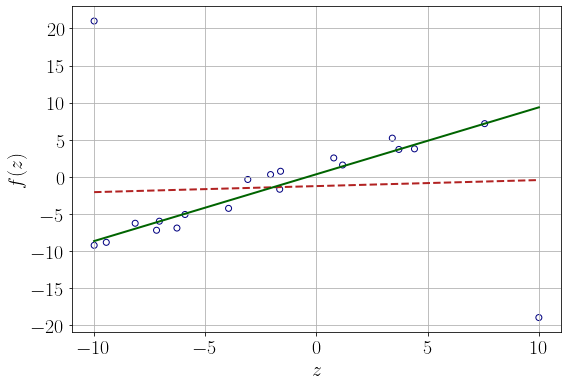

In [10]:
# Plot
fig, ax = plt.subplots(1,1)
ax.scatter(z, f, marker='o', facecolors='none', edgecolors='navy')
ax.set_xlabel('$z$')
ax.set_ylabel('$f(z)$')
ax.set_yticks(np.arange(-20, 20.1, step=5))  
ax.set_xticks(np.arange(-10, 10.1, step=5))  
ax.set_aspect(1/3)
ax.grid('on')
plt.savefig('l1_fit_data_only.pdf')

z_fit = np.array([-10, 10])

# l2 fit (plot line passing by two points)
f_fit = x_L2[0] + z_fit * x_L2[1]
ax.plot(z_fit, f_fit, linestyle="dashed", color="firebrick", 
        linewidth=2)
plt.savefig('l1_fit_l2_only.pdf')

# l1 fit (plot line passing by two points)
f_fit = x_L1[0] + z_fit * x_L1[1]
ax.plot(z_fit, f_fit, color="darkgreen", 
        linewidth=2)
plt.savefig('l1_fit_l1_and_l2.pdf')